In [1]:
# Libraries 
import numpy as np 
import pandas as pd
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os

In [2]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    path = "CAOPROJ/Train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

CAOPROJ/Train/0/
CAOPROJ/Train/1/
CAOPROJ/Train/2/
CAOPROJ/Train/3/
CAOPROJ/Train/4/
CAOPROJ/Train/5/
CAOPROJ/Train/6/
CAOPROJ/Train/7/
CAOPROJ/Train/8/
CAOPROJ/Train/9/
CAOPROJ/Train/10/
CAOPROJ/Train/11/
CAOPROJ/Train/12/
CAOPROJ/Train/13/
CAOPROJ/Train/14/
CAOPROJ/Train/15/
CAOPROJ/Train/16/
CAOPROJ/Train/17/
CAOPROJ/Train/18/
CAOPROJ/Train/19/
CAOPROJ/Train/20/
CAOPROJ/Train/21/
CAOPROJ/Train/22/
CAOPROJ/Train/23/
CAOPROJ/Train/24/
CAOPROJ/Train/25/
CAOPROJ/Train/26/
CAOPROJ/Train/27/
CAOPROJ/Train/28/
CAOPROJ/Train/29/
CAOPROJ/Train/30/
CAOPROJ/Train/31/
CAOPROJ/Train/32/
CAOPROJ/Train/33/
CAOPROJ/Train/34/
CAOPROJ/Train/35/
CAOPROJ/Train/36/
CAOPROJ/Train/37/
CAOPROJ/Train/38/
CAOPROJ/Train/39/
CAOPROJ/Train/40/
CAOPROJ/Train/41/
CAOPROJ/Train/42/


In [3]:
#Spliting the images into train and validation sets
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)


In [4]:
#Definition of the DNN model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)




In [10]:
#using ten epochs for the training and saving the accuracy for each epoch
#epochs = 5
#history = model.fit(X_train, y_train, batch_size=8, epochs=epochs,
#validation_data=(X_val, y_val))
#model.save("traffic_recognition.h5")
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

Epoch 1/20
103/981 [==>...........................] - ETA: 54s - accuracy: 0.9839 - loss: 0.0512

KeyboardInterrupt: 

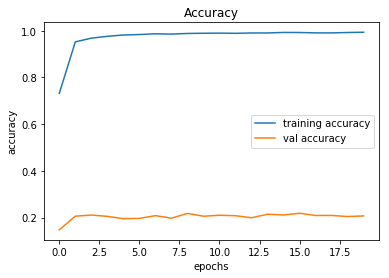

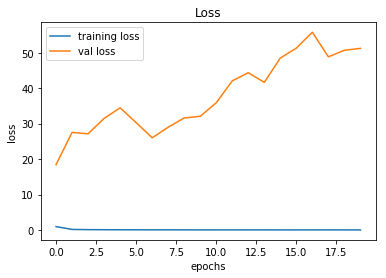

In [9]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


In [10]:
#Predicting with the test data
y_test=pd.read_csv("CAOPROJ/Test.csv")
labels=y_test['Path'].as_matrix()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('CAOPROJ/Test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)

d:\anaconda3\envs\cao\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8178939034045922

In [4]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model("traffic_recognition.h5")
#dictionary to label all traffic signs class
classes = { 1:'Speed limit (20km/h)',
    2:'Speed limit (30km/h)',
    3:'Speed limit (50km/h)',
    4:'Speed limit (60km/h)',
    5:'Speed limit (70km/h)',
    6:'Speed limit (80km/h)',
    7:'End of speed limit (80km/h)',
    8:'Speed limit (100km/h)',
    9:'Speed limit (120km/h)',
    10:'No passing',
    11:'No passing veh over 3.5 tons',
    12:'Right-of-way at intersection',
    13:'Priority road',
    14:'Yield',
    15:'Stop',
    16:'No vehicles',
    17:'Veh > 3.5 tons prohibited',
    18:'No entry',
    19:'General caution',
    20:'Dangerous curve left',
    21:'Dangerous curve right',
    22:'Double curve',
    23:'Bumpy road',
    24:'Slippery road',
    25:'Road narrows on the right',
    26:'Road work',
    27:'Traffic signals',
    28:'Pedestrians',
    29:'Children crossing',
    30:'Bicycles crossing',
    31:'Beware of ice/snow',
    32:'Wild animals crossing',
    33:'End speed + passing limits',
    34:'Turn right ahead',
    35:'Turn left ahead',
    36:'Ahead only',
    37:'Go straight or right',
    38:'Go straight or left',
    39:'Keep right',
    40:'Keep left',
    41:'Roundabout mandatory',
    42:'End of no passing',
    43:'End no passing veh > 3.5 tons' }

In [ ]:
def classify(file_path):
  image = Image.open(file_path)
  image = image.resize((30,30))
  image = numpy.expand_dims(image, axis=0)
  image = numpy.array(image)
  pred = model.predict_classes([image])[0]
  sign = classes[pred+1]
  print(sign)
  result.configure(text=sign)
def show_classify_btn(file_path):
  classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  classify_b.configure(bg='#364156', fg='white',font=('arial',10,'bold'))
  classify_b.place(relx=0.79,rely=0.46)
def upload_image():
  try:
    file_path=filedialog.askopenfilename()
    uploaded=Image.open(file_path)
    uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
    im=ImageTk.PhotoImage(uploaded)
    sign_image.configure(image=im)
    sign_image.image=im
    result.configure(text='')
    show_classify_btn(file_path)
  except:
    pass
if __name__=="__main__":
  #initialise GUI
  top=tk.Tk()
  top.geometry('800x600')
  top.title('Traffic sign recognition')
  top.configure(bg='#f9f6f7')
  heading = Label(top, text="Traffic sign recognition",pady=20, font=('arial',20,'bold'))
  heading.configure(background='#f9f6f7',fg='#364156')
  heading.pack()
  result=Label(top, font=('arial',15,'bold'))
  result.configure(fg='#011638',bg='#f9f6f7')
  sign_image = Label(top)
  upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
  upload.configure(background='#364156', fg='white',font=('arial',10,'bold'))
  upload.pack(side=BOTTOM,pady=50)
  sign_image.pack(side=BOTTOM,expand=True)
  result.pack(side=BOTTOM,expand=True)
  top.mainloop()

Road work
Road work
Speed limit (80km/h)
Roundabout mandatory
Dangerous curve right
Yield
Speed limit (80km/h)
General caution


In [23]:
tf.config.experimental.list_physical_devices('GPU')
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0
